In [2]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from PIL import Image

def crop_patches(image, embedding_index, patch_size=14):
    """
    Crops a 5x5 grid of patches centered around the specified embedding index from the image.
    If the patch is on an edge, out-of-bounds patches are filled with black.

    Args:
        image (PIL.Image.Image): The input image (must be 224x224 pixels).
        embedding_index (int): The embedding index (1 to 256).
        patch_size (int): The size of each patch (default is 14).

    Returns:
        PIL.Image.Image: The cropped image containing the 5x5 grid of patches.
    """
    # Validate embedding index
    if embedding_index < 1 or embedding_index > 256:
        raise ValueError("Embedding index must be between 1 and 256.")

    # Calculate grid size
    num_patches = 16  # Since image size is 224 and patch size is 14
    image_size = patch_size * num_patches  # Should be 224

    # Ensure image is the correct size
    if image.size != (image_size, image_size):
        image = image.resize((image_size, image_size))

    # Adjust for class token
    p = embedding_index - 1
    i = p % num_patches  # Column index
    j = p // num_patches  # Row index

    # Create a new image to hold the 5x5 grid of patches
    output_size = patch_size * 5
    output_image = Image.new('RGB', (output_size, output_size), color='black')

    # Loop over the 5x5 grid
    for dx in range(-2, 3):
        for dy in range(-2, 3):
            # Compute the patch indices
            ii = i + dx
            jj = j + dy

            # Position in the output image
            x_out = (dx + 2) * patch_size
            y_out = (dy + 2) * patch_size

            # Check if the patch is within bounds
            if 0 <= ii < num_patches and 0 <= jj < num_patches:
                # Compute pixel coordinates in the original image
                x_start = ii * patch_size
                y_start = jj * patch_size
                x_end = x_start + patch_size
                y_end = y_start + patch_size

                # Crop the patch from the original image
                patch = image.crop((x_start, y_start, x_end, y_end))
            else:
                # Create a black patch for out-of-bounds areas
                patch = Image.new('RGB', (patch_size, patch_size), color='black')

            # Paste the patch into the output image
            output_image.paste(patch, (x_out, y_out))

    return output_image


../cruft/top9/layer_2_resid/feature_144/144_top9.json [1.581303358078003, 1.4669767618179321, 1.4118419885635376, 1.3660145998001099, 1.3280129432678223, 1.297037124633789, 1.251468539237976, 1.2385215759277344, 1.2293988466262817]
../cruft/top9/layer_2_resid/feature_144


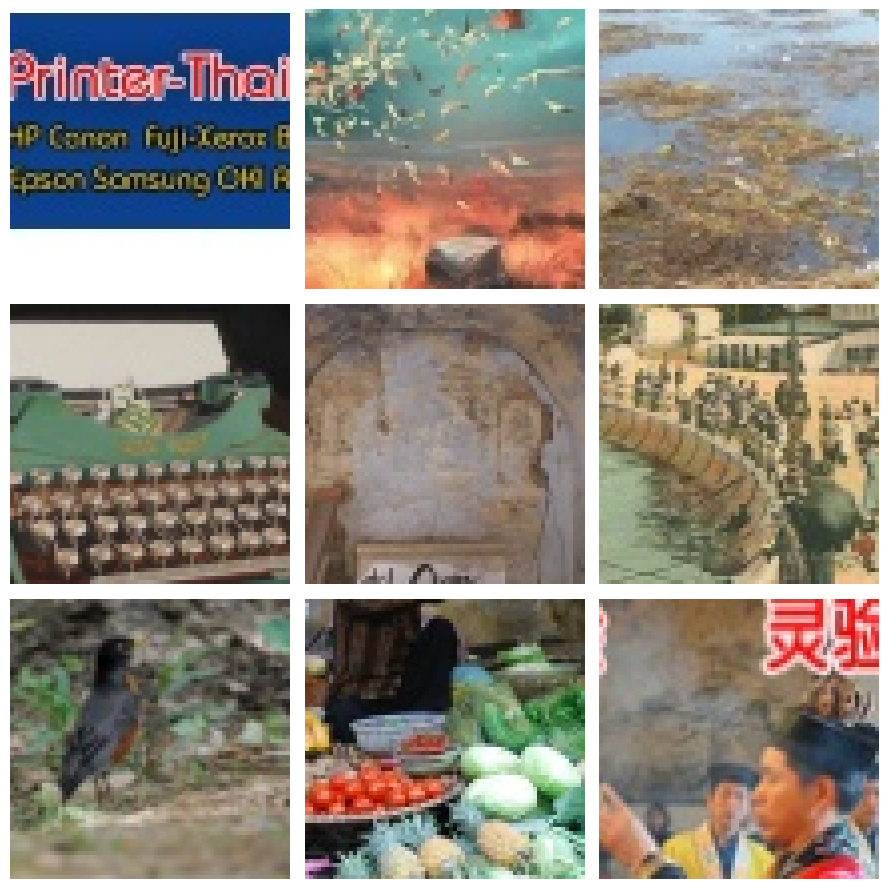

../cruft/top9/layer_2_resid/feature_147/147_top9.json [2.565941333770752, 1.4645440578460693, 1.327049732208252, 1.2830036878585815, 1.2694392204284668, 1.1874089241027832, 1.1592329740524292, 1.150911569595337, 1.1017276048660278]
../cruft/top9/layer_2_resid/feature_147


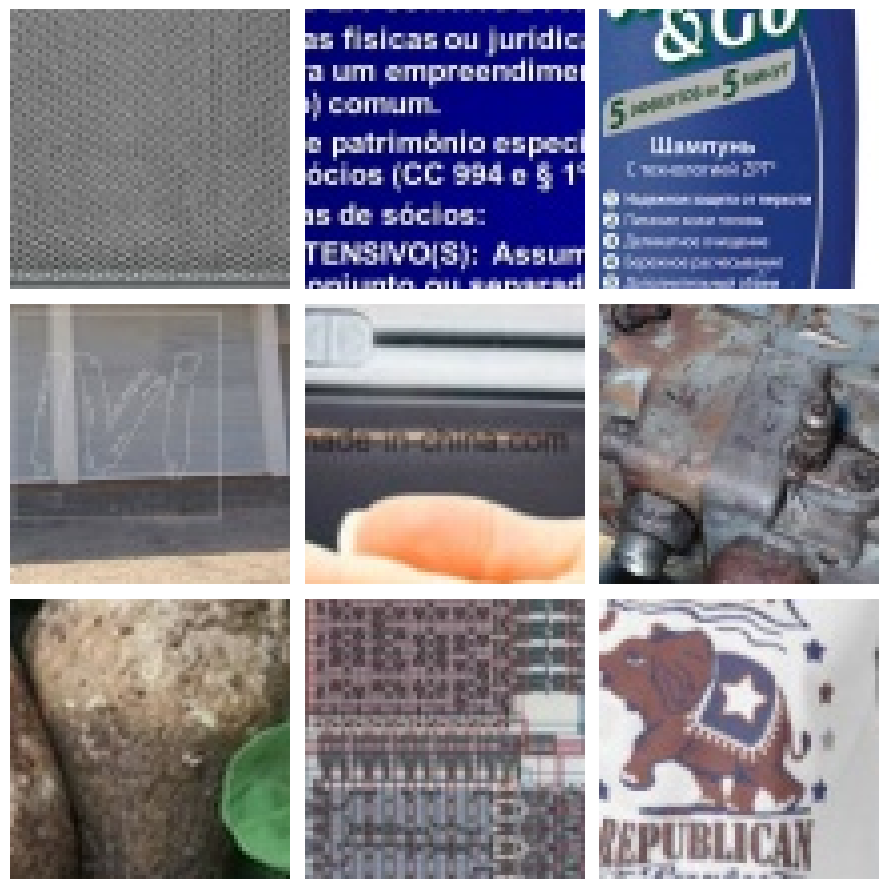

../cruft/top9/layer_2_resid/feature_149/149_top9.json [2.2993087768554688, 2.0549404621124268, 2.0496785640716553, 1.9736719131469727, 1.7032756805419922, 1.6782704591751099, 1.6764193773269653, 1.6613255739212036, 1.6449459791183472]
../cruft/top9/layer_2_resid/feature_149


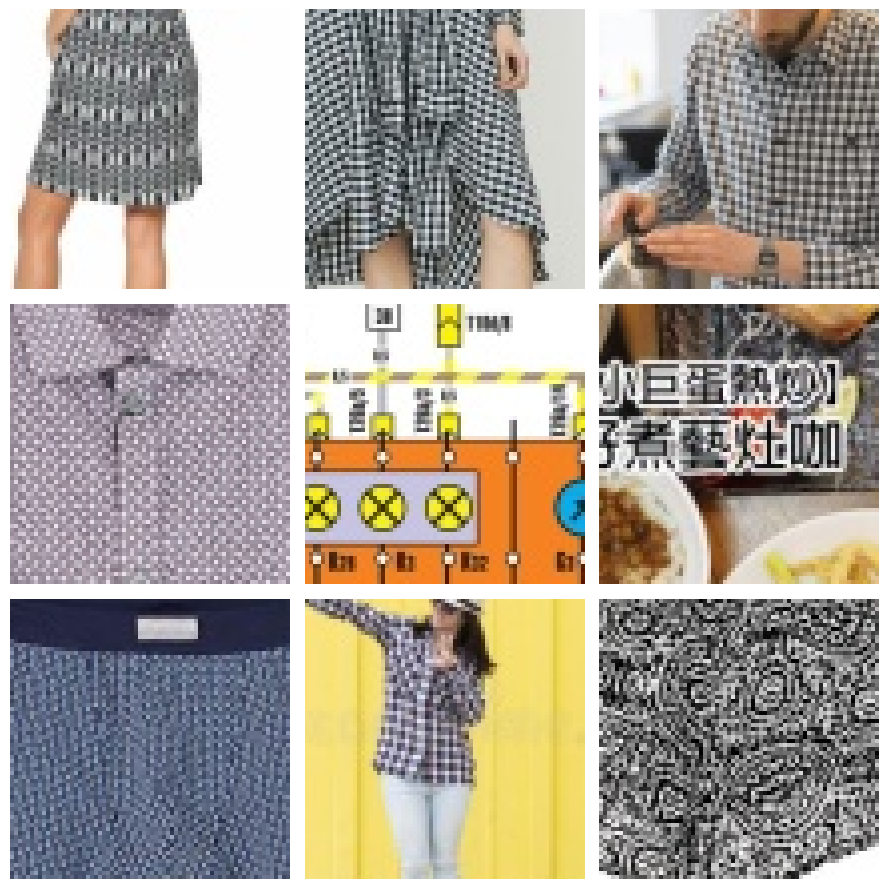

../cruft/top9/layer_2_resid/feature_155/155_top9.json [1.5037366151809692, 1.3819578886032104, 1.1840167045593262, 1.1771485805511475, 1.1603684425354004, 1.1269980669021606, 1.1052436828613281, 1.0764421224594116, 1.0748759508132935]
../cruft/top9/layer_2_resid/feature_155


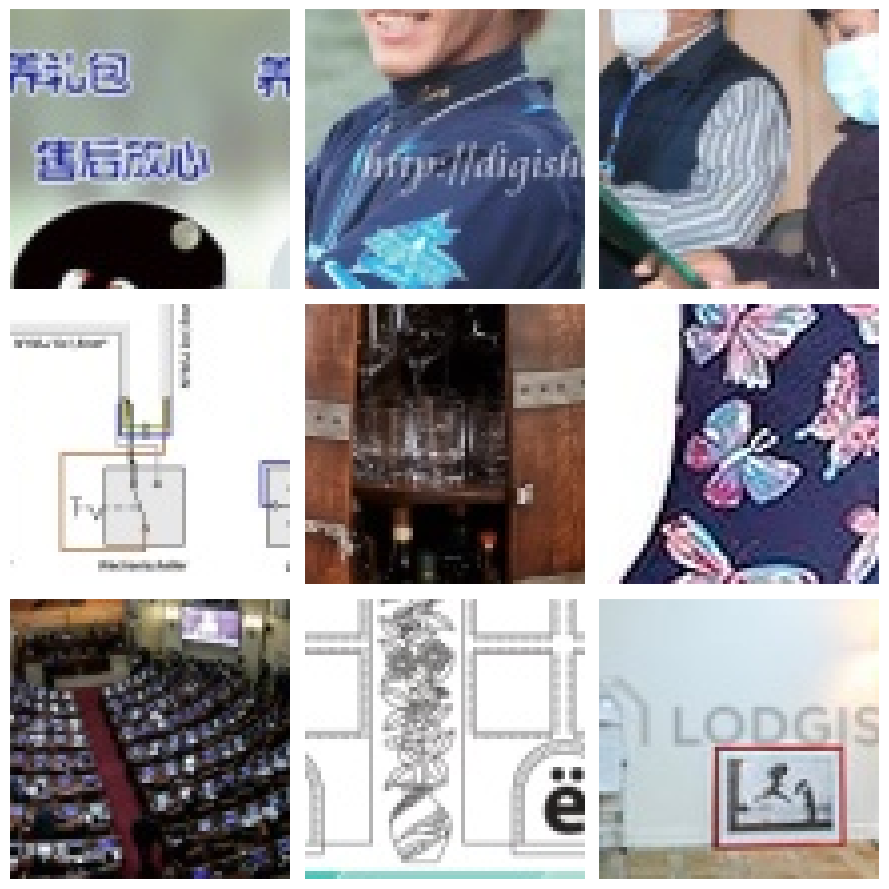

../cruft/top9/layer_2_resid/feature_159/159_top9.json [1.8224692344665527, 1.6187551021575928, 1.465663194656372, 1.2565593719482422, 1.2501091957092285, 1.2255910634994507, 1.1885885000228882, 1.146803617477417, 1.1119040250778198]
../cruft/top9/layer_2_resid/feature_159


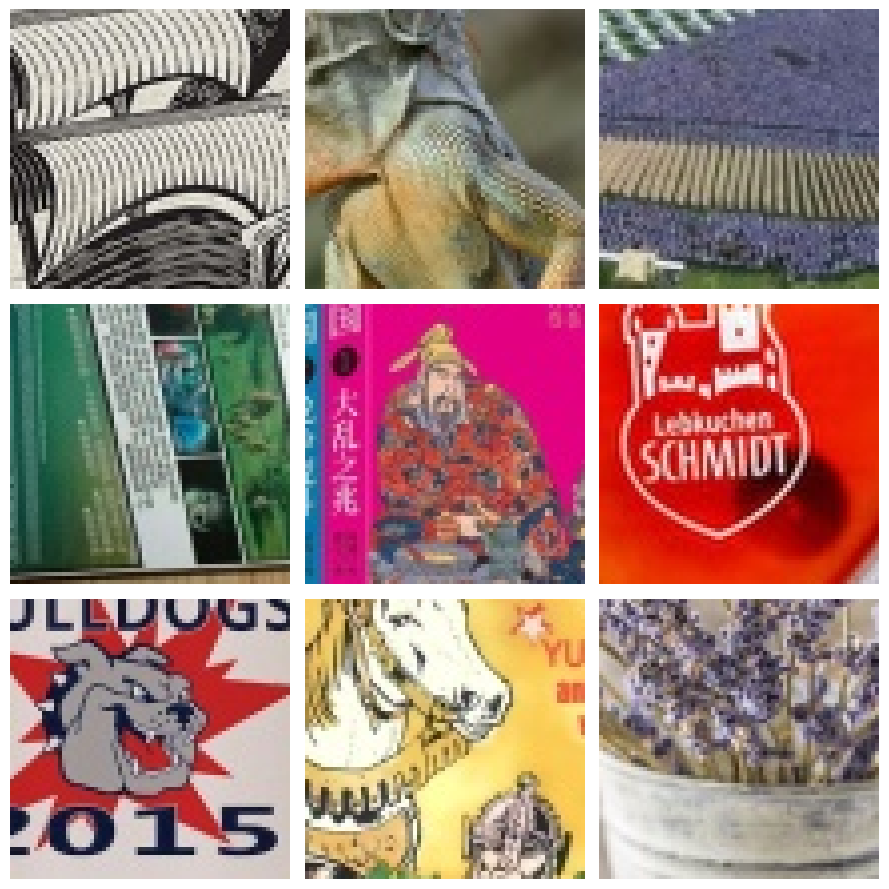

../cruft/top9/layer_2_resid/feature_18/18_top9.json [3.735701084136963, 3.6795153617858887, 3.6596829891204834, 3.6461219787597656, 3.4840996265411377, 3.473513126373291, 3.144941806793213, 3.045551300048828, 2.938324451446533]
../cruft/top9/layer_2_resid/feature_18


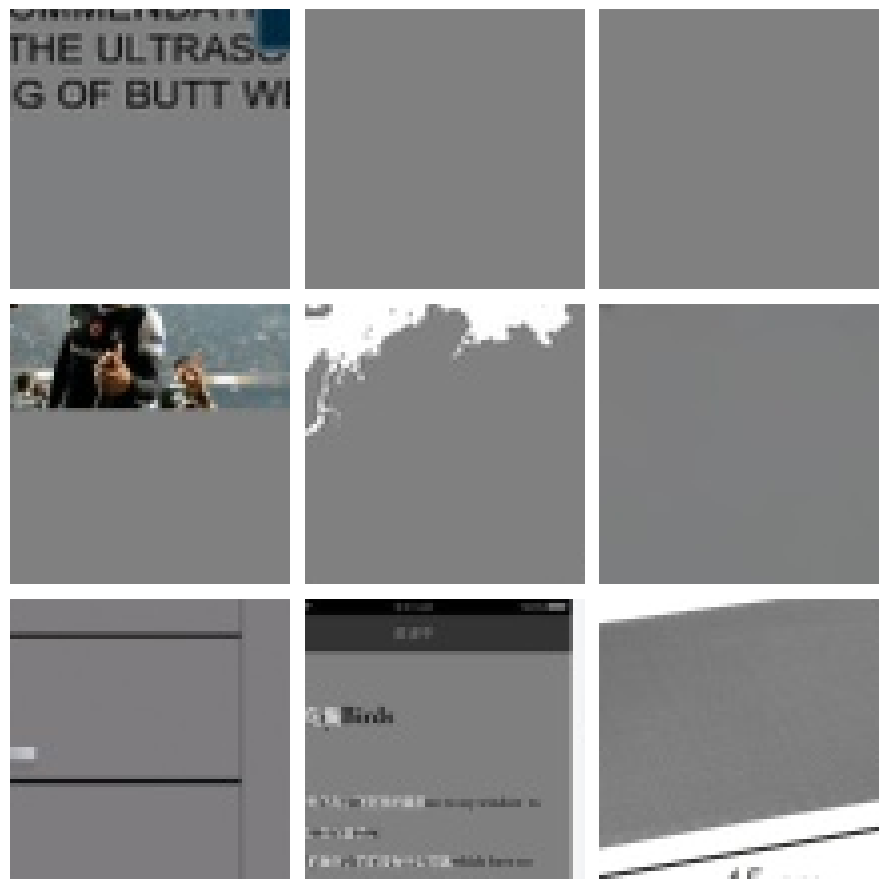

../cruft/top9/layer_2_resid/feature_188/188_top9.json [2.1391985416412354, 1.513176441192627, 1.4154118299484253, 1.1404931545257568, 1.0761696100234985, 1.0290722846984863, 0.995847225189209, 0.9289908409118652, 0.904861569404602]
../cruft/top9/layer_2_resid/feature_188


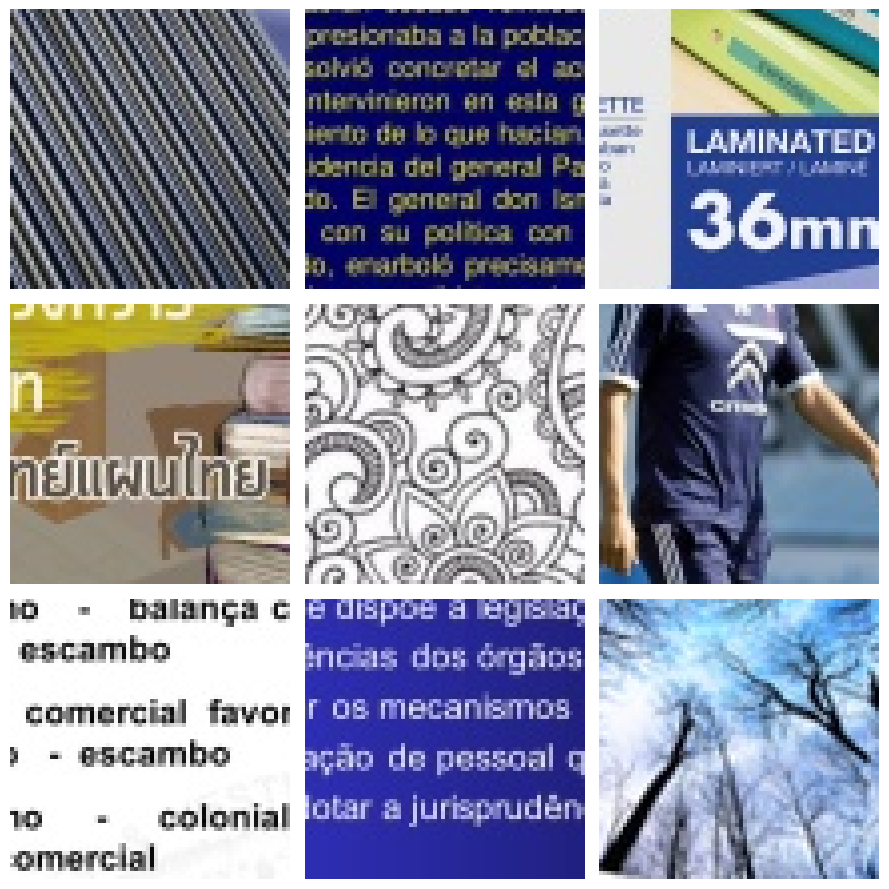

../cruft/top9/layer_2_resid/feature_19/19_top9.json [1.7018816471099854, 1.3077794313430786, 1.2978256940841675, 1.2669703960418701, 1.2003087997436523, 1.1742396354675293, 1.1520147323608398, 1.1410843133926392, 1.1336082220077515]
../cruft/top9/layer_2_resid/feature_19


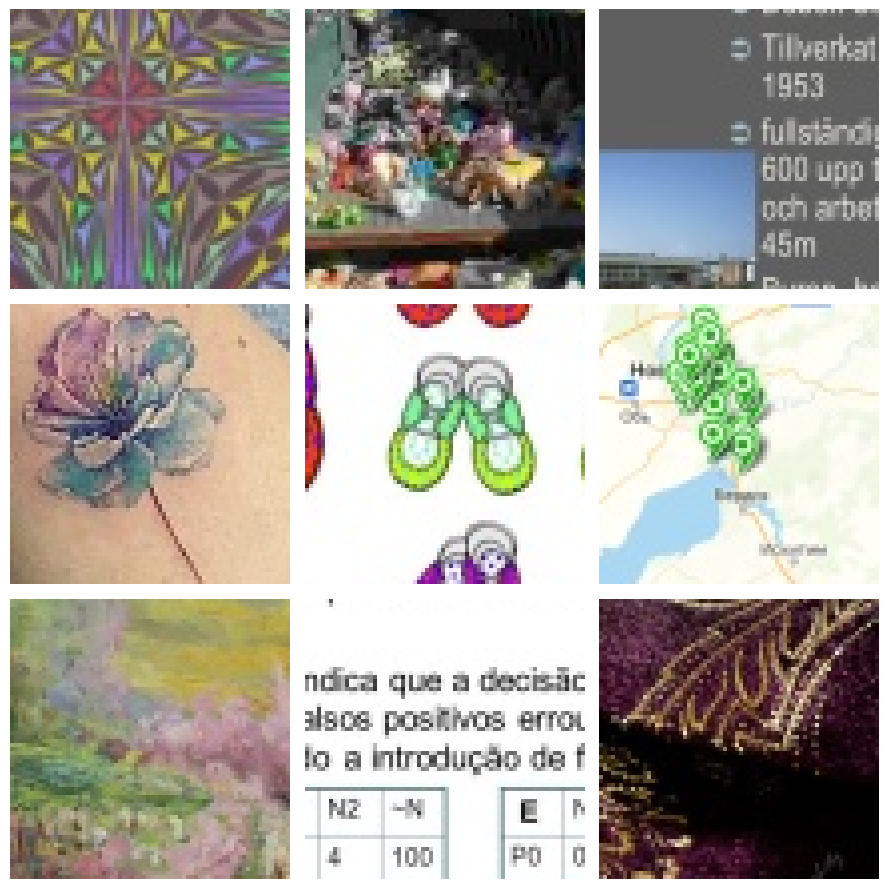

../cruft/top9/layer_2_resid/feature_203/203_top9.json [1.8928321599960327, 1.8826935291290283, 1.7265934944152832, 1.6809207201004028, 1.6740137338638306, 1.5500503778457642, 1.5134714841842651, 1.4187874794006348, 1.391425609588623]
../cruft/top9/layer_2_resid/feature_203


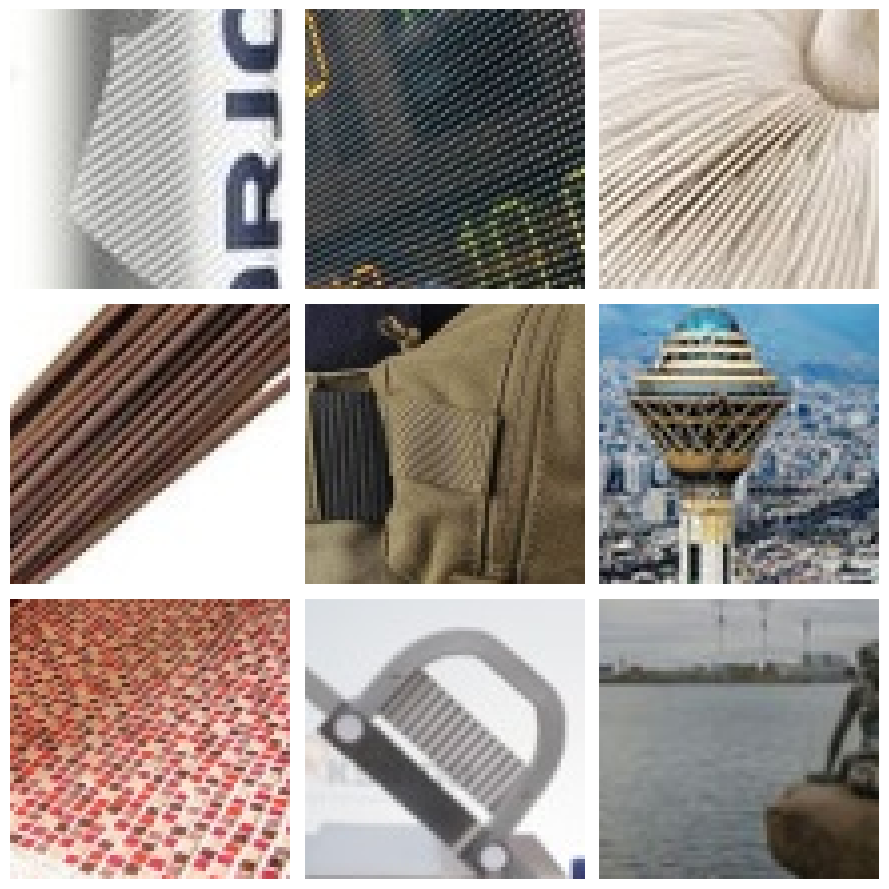

../cruft/top9/layer_2_resid/feature_206/206_top9.json [1.9232901334762573, 1.4579222202301025, 1.3930078744888306, 1.3718336820602417, 1.335392713546753, 1.3351222276687622, 1.3234726190567017, 1.3083943128585815, 1.281297206878662]
../cruft/top9/layer_2_resid/feature_206


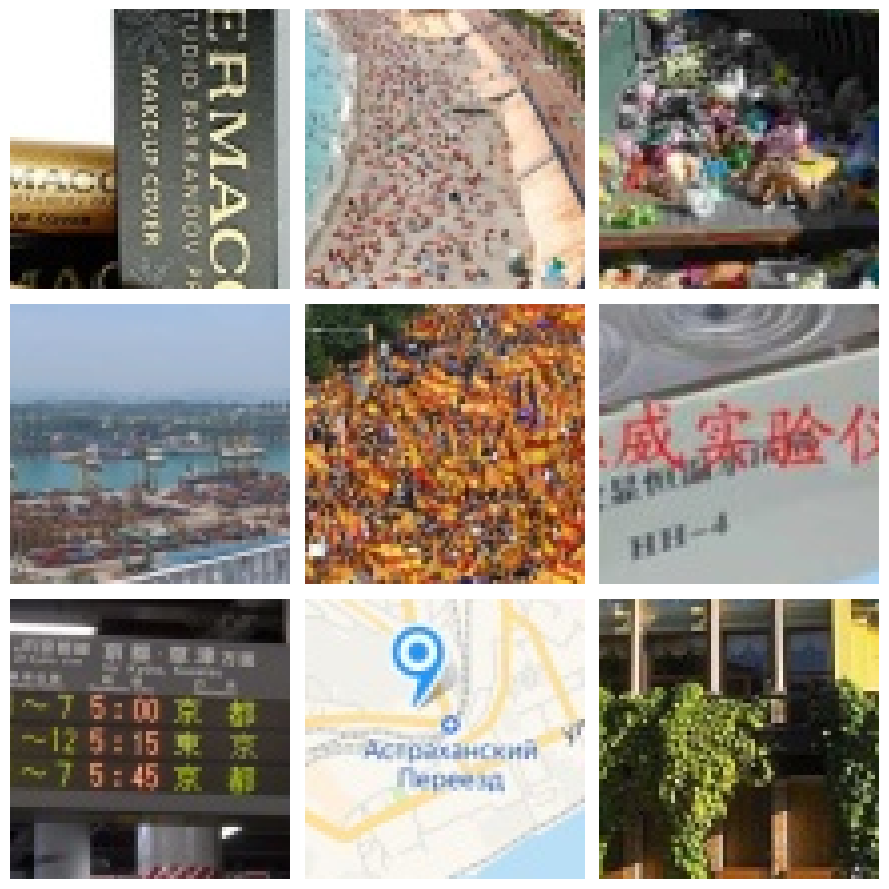

../cruft/top9/layer_2_resid/feature_213/213_top9.json [2.8553059101104736, 1.462850570678711, 1.2176470756530762, 1.1667966842651367, 1.1139283180236816, 1.068140983581543, 1.0433541536331177, 0.9949020147323608, 0.976809024810791]
../cruft/top9/layer_2_resid/feature_213


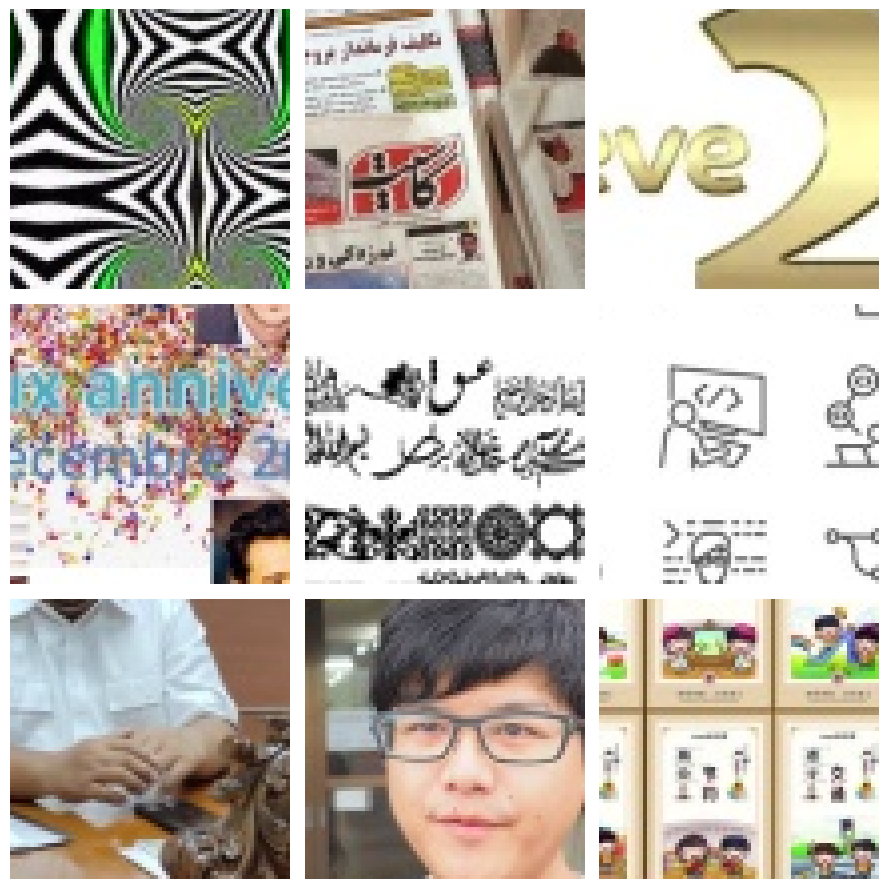

../cruft/top9/layer_2_resid/feature_215/215_top9.json [1.990976333618164, 0.9838051199913025, 0.9513921737670898, 0.9223289489746094, 0.9195777177810669, 0.9136135578155518, 0.8722085952758789, 0.8333919048309326, 0.8254382014274597]
../cruft/top9/layer_2_resid/feature_215


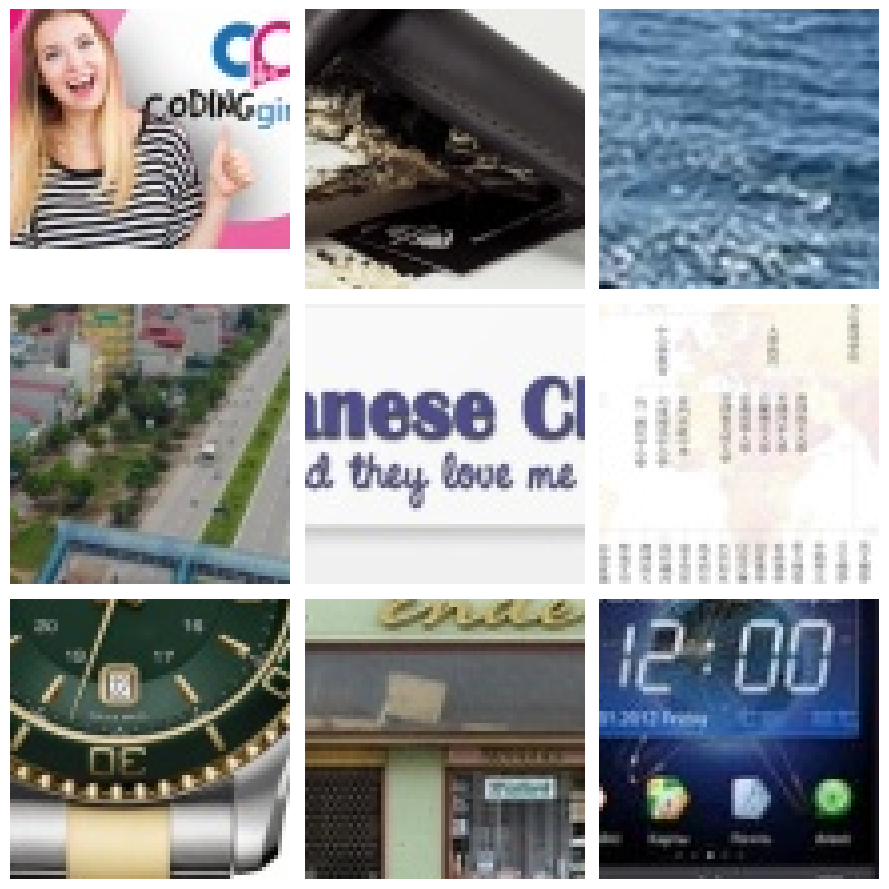

../cruft/top9/layer_2_resid/feature_217/217_top9.json [1.6101179122924805, 1.3232154846191406, 1.242876410484314, 1.154579997062683, 1.1483314037322998, 1.1384745836257935, 1.136568546295166, 1.1325304508209229, 1.1196426153182983]
../cruft/top9/layer_2_resid/feature_217


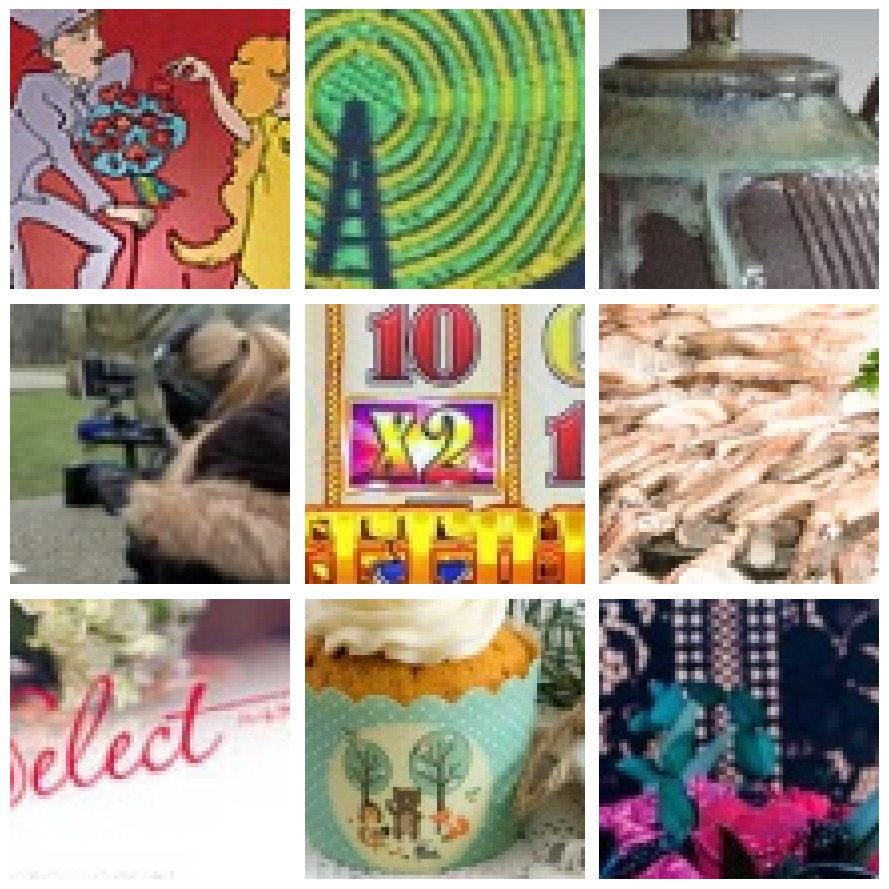

../cruft/top9/layer_2_resid/feature_228/228_top9.json [2.0396037101745605, 1.7791413068771362, 1.7565655708312988, 1.6660668849945068, 1.5497788190841675, 1.536609172821045, 1.5138294696807861, 1.4729266166687012, 1.467624545097351]
../cruft/top9/layer_2_resid/feature_228


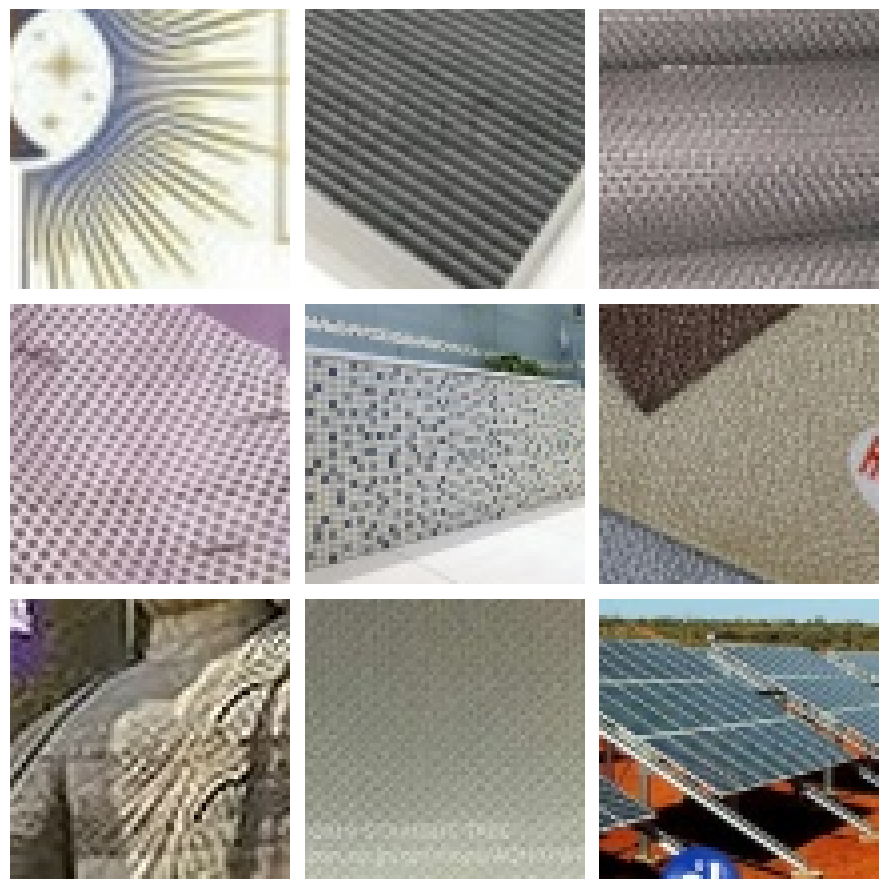

../cruft/top9/layer_2_resid/feature_241/241_top9.json [2.2433242797851562, 1.6107977628707886, 1.5628005266189575, 1.5383074283599854, 1.5369459390640259, 1.5028700828552246, 1.490661382675171, 1.4736945629119873, 1.462622046470642]
../cruft/top9/layer_2_resid/feature_241


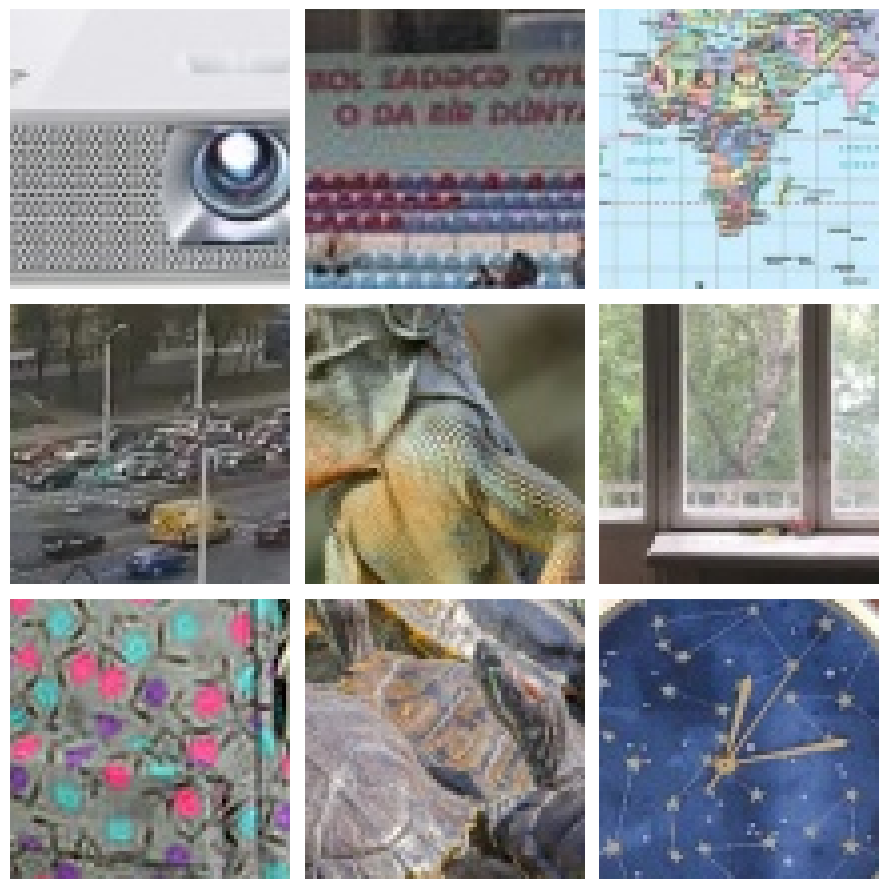

../cruft/top9/layer_2_resid/feature_254/254_top9.json [1.5637396574020386, 1.4288400411605835, 1.4157671928405762, 1.3715860843658447, 1.327782392501831, 1.3088595867156982, 1.2904858589172363, 1.2649307250976562, 1.2607142925262451]
../cruft/top9/layer_2_resid/feature_254


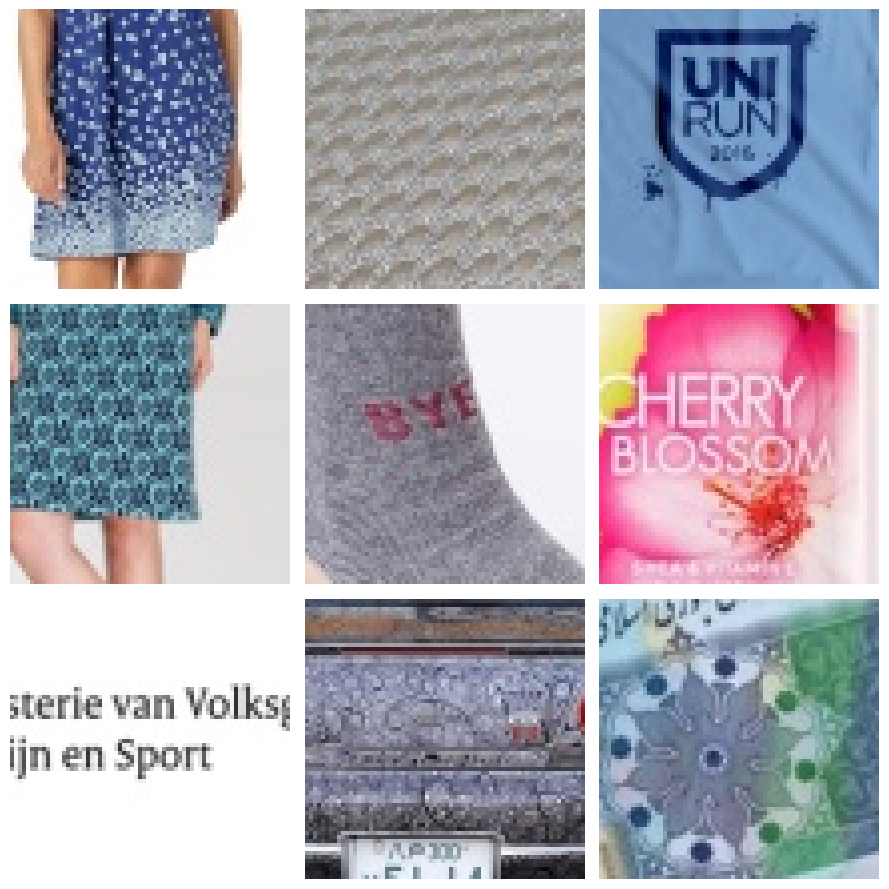

../cruft/top9/layer_2_resid/feature_263/263_top9.json [1.6903375387191772, 1.643772840499878, 1.6118266582489014, 1.4393072128295898, 1.4112377166748047, 1.3986356258392334, 1.3979072570800781, 1.3321022987365723, 1.3228180408477783]
../cruft/top9/layer_2_resid/feature_263


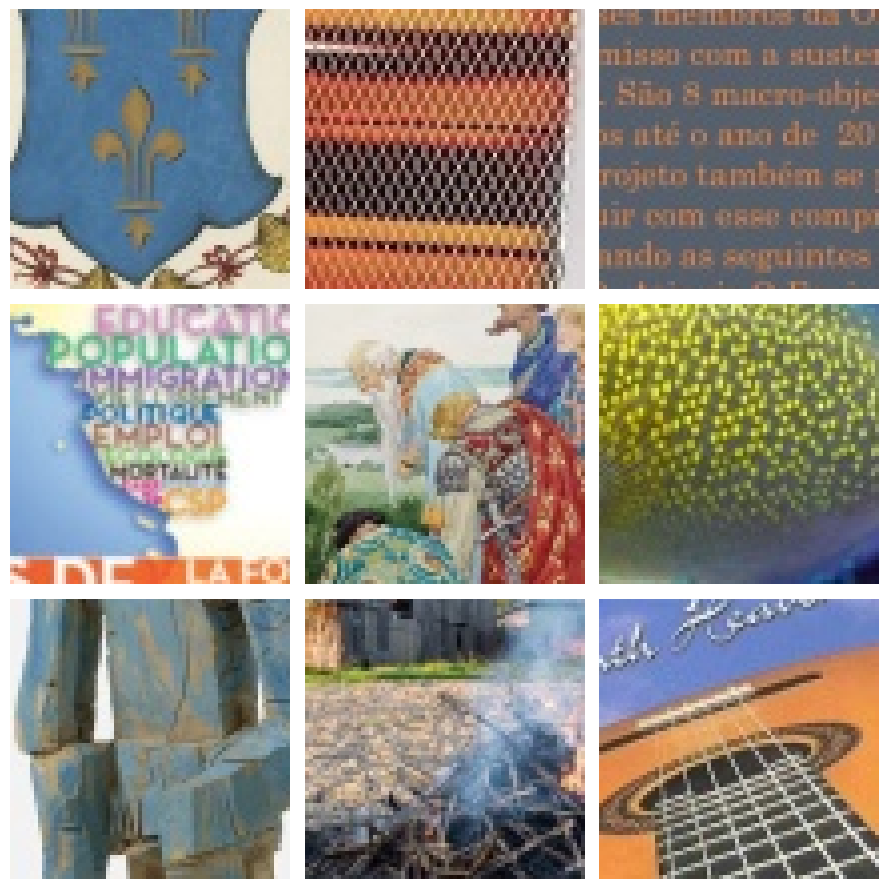

../cruft/top9/layer_2_resid/feature_27/27_top9.json [1.9427518844604492, 1.84458327293396, 1.7168277502059937, 1.4451472759246826, 1.4427309036254883, 1.360164999961853, 1.3360421657562256, 1.327245831489563, 1.3064687252044678]
../cruft/top9/layer_2_resid/feature_27


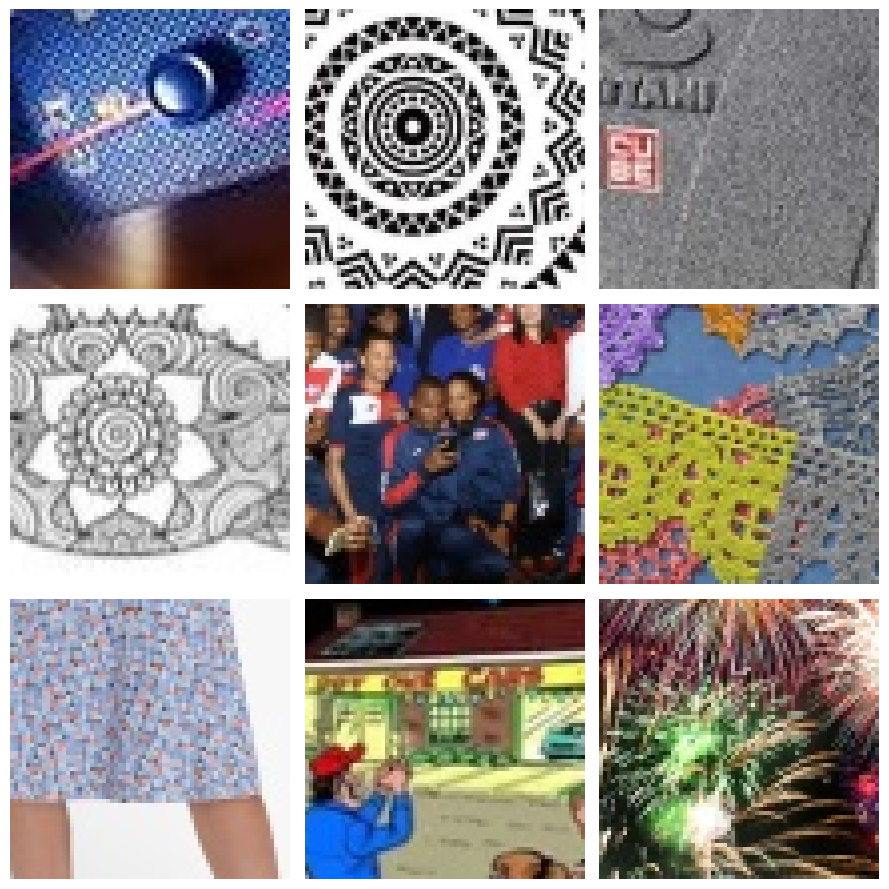

../cruft/top9/layer_2_resid/feature_275/275_top9.json [6.0146989822387695, 4.356333255767822, 4.273240566253662, 3.771573781967163, 3.6548266410827637, 2.839082956314087, 2.5910494327545166, 2.2840006351470947, 2.00589656829834]
../cruft/top9/layer_2_resid/feature_275


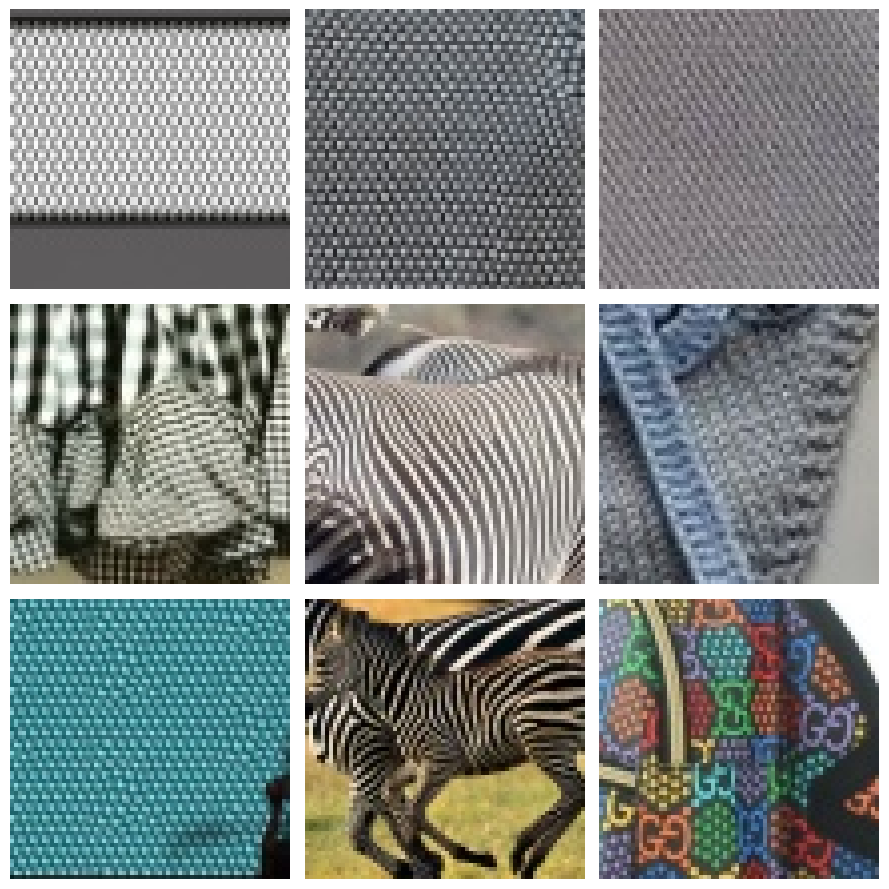

../cruft/top9/layer_2_resid/feature_305/305_top9.json [1.5117974281311035, 1.3874980211257935, 1.362753987312317, 1.3550124168395996, 1.3323711156845093, 1.2445005178451538, 1.2086145877838135, 1.2024154663085938, 1.195889949798584]
../cruft/top9/layer_2_resid/feature_305


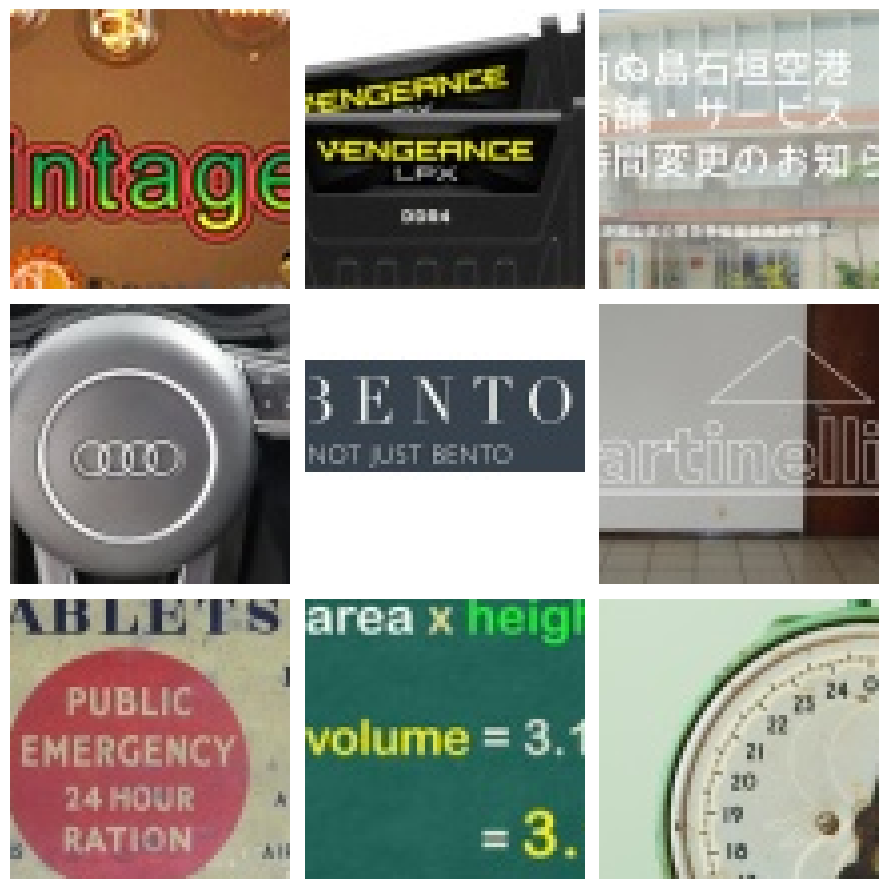

../cruft/top9/layer_2_resid/feature_306/306_top9.json [1.724007487297058, 1.455230474472046, 1.3863375186920166, 1.3367863893508911, 1.3281126022338867, 1.317952036857605, 1.272855281829834, 1.260624647140503, 1.2580167055130005]
../cruft/top9/layer_2_resid/feature_306


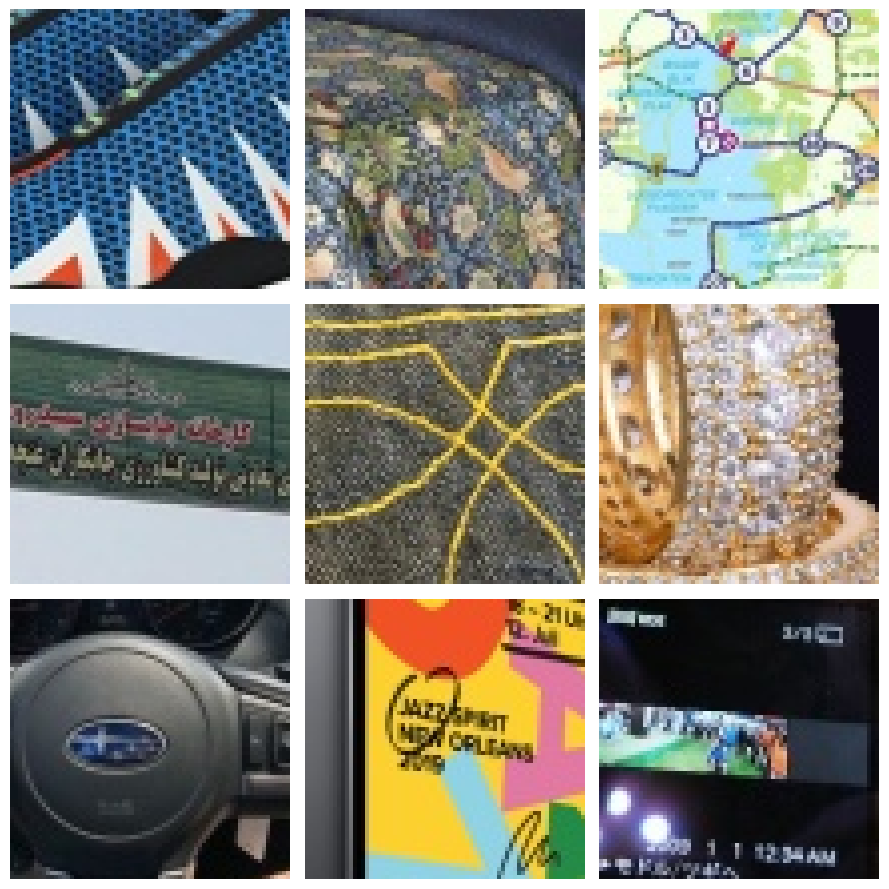

In [8]:
base_dir = '../cruft/top9/layer_2_resid'

subdirs = os.listdir(base_dir)

files = []

for subdir in subdirs:
    if subdir != 'stats.json':
        abs_subdir = os.path.join(base_dir, subdir)
        files += [os.path.join(abs_subdir, x) for x in os.listdir(abs_subdir) if '.json' in x]

seq_idx = 137

count = 0
for file in sorted(files):
    with open(file) as f:
        data = json.load(f)
    
    if max(data['values']) > 1.5:
        print(file, data['values'])


        if seq_idx != 0:
            images = []
            parent = os.path.dirname(file)
            print(parent)

            img_files = sorted([os.path.join(parent, f) for f in os.listdir(parent) if 'grid' not in f and '.json' not in f])
            
            new_grid = []
            for f in img_files:
                new_grid.append(crop_patches(Image.open(f), seq_idx))

            if len(new_grid) != 9:
                print(f"Expected 9 images, found {len(new_grid)} in {parent}. Skipping.")
                continue

            # Now, plot the new_grid images in a 3x3 grid
            fig, axes = plt.subplots(3, 3, figsize=(9, 9))

            for idx, ax in enumerate(axes.flatten()):
                ax.imshow(new_grid[idx])
                ax.axis('off')

            plt.tight_layout()
            plt.show()
        else:
            img = Image.open(file.replace('top9.json', 'grid.png'))
            plt.imshow(img)
            plt.axis('off')
            plt.show()

        count += 1
        if count > 20:
            break

        

In [ ]:


    # 17
    # - clothes
    # - russian text 133
    # - headshots 128
    # - 14 european housing


# 17 cls 
# - text at the bottom 648 
# - black clothes 732 
# - advertising for locations/holidays 892

# 17 token 1
# - grey border 298
# 

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np
import tarfile
import torchvision.transforms as transforms
from torchvision.io import read_image, ImageReadMode, decode_jpeg
from sache import SpecifiedHookedViT
import boto3

In [ ]:
with open('../vitsae/cruft/new.pt', 'rb') as f:
    b = f.read()

new = torch.frombuffer(b, dtype=torch.float32)


with open('../vitsae/cruft/old.pt', 'rb') as f:
    b = f.read()

old = torch.frombuffer(b, dtype=torch.float32)

In [ ]:
print('new', new.mean().item(), new.std().item())
print('old', old.mean().item(), old.std().item())


In [ ]:
new = torch.load('../vitsae/cruft/new.pt')
old = torch.load('../vitsae/cruft/old.pt')


In [ ]:
def create_random_image(width, height, mode='RGB'):
    """
    Creates a new PIL Image with random pixels.

    :param width: Width of the image in pixels.
    :param height: Height of the image in pixels.
    :param mode: Color mode of the image. Common modes include 'RGB', 'RGBA', 'L' (grayscale).
    :return: PIL Image object with random pixels.
    """
    if mode == 'RGB':
        # For RGB, we need three channels
        array = np.random.randint(0, 256, (height, width, 3), dtype='uint8')
    elif mode == 'RGBA':
        # For RGBA, we need four channels
        array = np.random.randint(0, 256, (height, width, 4), dtype='uint8')
    elif mode == 'L':
        # For grayscale, we need one channel
        array = np.random.randint(0, 256, (height, width), dtype='uint8')
    else:
        raise ValueError(f"Unsupported mode: {mode}")

    # Create the image from the array
    image = Image.fromarray(array, mode)
    return image


In [ ]:
img = create_random_image(64, 64, mode='RGB')

img_bytes = io.BytesIO()
img.save(img_bytes, format='JPEG')
img_data = img_bytes.getvalue()



In [ ]:
tar = '../vitact/test/tars/00001-1200-1500.70.ready.tar'

with tarfile.open(tar, 'r') as tar:
    for member in tar:
        if member.isfile() and member.name.lower().endswith('.jpg'):
            with tar.extractfile(member) as file_obj:
                try:
                    img_bytes = file_obj.read()
                    tensor_bytes = torch.frombuffer(img_bytes, dtype=torch.uint8)
                    image = decode_jpeg(tensor_bytes, mode=ImageReadMode.RGB)
                except:
                    print(member, 'error')

In [ ]:
tensor_bytes = torch.frombuffer(img_data, dtype=torch.uint8)
image = decode_jpeg(tensor_bytes, mode=ImageReadMode.RGB)


In [ ]:
with open('cruft/img.jpeg', 'rb') as f:
    by = f.read()
    print(by)
    tensor_bytes = torch.frombuffer(by, dtype=torch.uint8)
    image = decode_jpeg(tensor_bytes, mode=ImageReadMode.RGB)


In [ ]:
def print_stats(tensor):
    if tensor.dtype is not torch.float32:
        print('cannot print stats for non-float32 tensor')
    else:
        print('mean', round(tensor.mean().item(), 4), 'std', round(tensor.std().item(), 4), 'min', round(tensor.min().item(), 4), 'max', round(tensor.max().item(), 4))

In [ ]:
model_name ='laion/CLIP-ViT-L-14-laion2B-s32B-b82K'
processor = CLIPProcessor.from_pretrained(model_name)
transform = transforms.ToTensor()

In [ ]:
hook_locations = [
    (2, 'resid'),
    (20, 'resid'),
]
transformer = SpecifiedHookedViT(hook_locations, model_name, device='cuda')

In [ ]:
img = Image.open('cruft/img.jpeg')
img2 = read_image('cruft/img.jpeg', mode=ImageReadMode.RGB)
with open('cruft/img.jpeg', 'rb') as f:
    tensor_bytes = torch.frombuffer(f.read(), dtype=torch.uint8)

img3 = decode_jpeg(tensor_bytes, mode=ImageReadMode.RGB)
img4 = (transforms.ToTensor()(img) * 255).to(torch.uint8)

In [ ]:
q  = processor(images=img3, text = "", return_tensors="pt", padding = True)
print('Image.open')
print_stats(q['pixel_values'])

In [ ]:
q  = processor(images=img, text = "", return_tensors="pt", padding = True)
print('Image.open')
print_stats(q['pixel_values'])

In [ ]:
q  = processor(images=img2, text = "", return_tensors="pt", padding = True)
print('read_image')
print_stats(q['pixel_values'])

In [ ]:
q  = processor(images=img4, text = "", return_tensors="pt", padding = True)
print('read_image')
print_stats(q['pixel_values'])

In [ ]:
o1 = transformer.all_activations(it1.unsqueeze(0).cuda())
o2 = transformer.all_activations(it2.unsqueeze(0).cuda())
o3 = transformer.all_activations(it3.unsqueeze(0).cuda())


In [ ]:
location = (2, 'resid')
print('Image.open')
print_stats(o1[location][0, 1])
print('read_image')
print_stats(o2[location][0, 1])
print('mouse read_image')
print_stats(o3[location][0, 1])

cos = torch.nn.functional.cosine_similarity(o1[location], o2[location], dim=-1)
print('imag.open and read_image', cos.mean().item())
cos = torch.nn.functional.cosine_similarity(o2[location], o3[location], dim=-1)
print('mouse and dock read_image', cos.mean().item())

plt.figure(figsize=(25, 5))

plt.plot(o1[location][0, 1].cpu().detach().numpy())
plt.plot(o2[location][0, 1].cpu().detach().numpy())
plt.plot(o3[location][0, 1].cpu().detach().numpy())


plt.show()


plt.figure(figsize=(25, 5))

plt.plot(o1[location][0, 0].cpu().detach().numpy())
plt.plot(o2[location][0, 0].cpu().detach().numpy())
plt.plot(o3[location][0, 0].cpu().detach().numpy())


plt.show()

# show cosine similarity between o1[location] and o2[location]




In [ ]:
location = (20, 'resid')
print('Image.open')
print_stats(o1[location][0, 1])
print('read_image')
print_stats(o2[location][0, 1])
print('mouse read_image')
print_stats(o3[location][0, 1])

cos = torch.nn.functional.cosine_similarity(o1[location], o2[location], dim=-1)
print('imag.open and read_image', cos.mean().item())
cos = torch.nn.functional.cosine_similarity(o2[location], o3[location], dim=-1)
print('mouse and dock read_image', cos.mean().item())

plt.figure(figsize=(25, 5))

plt.plot(o1[location][0, 1].cpu().detach().numpy())
plt.plot(o2[location][0, 1].cpu().detach().numpy())
plt.plot(o3[location][0, 1].cpu().detach().numpy())


plt.show()


plt.figure(figsize=(25, 5))

plt.plot(o1[location][0, 0].cpu().detach().numpy())
plt.plot(o2[location][0, 0].cpu().detach().numpy())
plt.plot(o3[location][0, 0].cpu().detach().numpy())


plt.show()

# show cosine similarity between o1[location] and o2[location]




In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import torch

In [ ]:
# ! aws s3  cp s3://sae-activations/log/CLIP-ViT-L-14/20_resid/20_resid_5998fd.jsoml ./
# ! aws s3  cp s3://sae-activations/log/CLIP-ViT-L-14/20_resid/20_resid_5998fd.jsonl ./

In [ ]:
files = [
    '../vitsae/cruft/2_resid_29c579.jsonl',
    '../vitsae/cruft/20_resid_5998fd.jsonl',
]
infos = []
for file in files:
    rows = []
    with open(file) as f:
        lines = f.readlines()
        for l in lines:
            rows.append(json.loads(l))


    info = defaultdict(list)
    info['name'] = file

    for row in rows:
            for k in ['mbps', 'enc', 'dec', 'enc_b', 'dec_b', 'delta_hist', 'input_hist', 'reconstruction_hist', 'current_k',
                    'latent_hist', 'rmse', 'mse', 'sum_mse', 'scaled_mse', 'input_mean', 'input_std', 'L0', 'L1', 'loss', 'dead_feature_prop', 'dead_latent_pct',
                    'experts_chosen_hist', 'enc_hist', 'dec_hist', 
                    'enc_grad_hist', 'dec_grad_hist', 'router_grad_hist', 'pre_grad_hist',
                    'pos_mask',
                    'position_mse', 'ma_count', 'massive_activations'
                    
                    ]:
                if k in row:
                    info[k].append(row[k])


    infos.append(info)

In [ ]:
for i in range(0, 5000, 500):
    plt.plot(infos[1]['position_mse'][i][:40])  

plt.yscale('log')

In [ ]:
for i in range(0, 5000, 500):
    plt.plot(infos[1]['position_mse'][i])

plt.yscale('log')

In [ ]:
i = 101
info = infos[0]
h = info['latent_hist']
hist = np.array(h[i]['counts'])
edges = np.array(h[i]['edges'])

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(edges[:-1], hist, width=np.diff(edges), edgecolor='black', align='edge')  # Plot histogram
plt.grid()
# Apply a logarithmic scale to exaggerate lower frequencies and downplay higher ones
plt.yscale('log')

# Labeling the axes
plt.xlabel('Value')
plt.ylabel('Log Frequency')  # Indicate that y-axis is log-scaled
plt.title('Histogram of Tensor Values (Log-scaled Frequency)')

# Show the plot
plt.show()

for i in range(0, 5000, 500):
    print(sum(h[i]['counts']))

In [ ]:
i = 4000
info = infos[1]
h = info['latent_hist']
hist = np.array(h[i]['counts'])
edges = np.array(h[i]['edges'])

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(edges[:-1], hist, width=np.diff(edges), edgecolor='black', align='edge')  # Plot histogram

# Apply a logarithmic scale to exaggerate lower frequencies and downplay higher ones
plt.yscale('log')
plt.grid()
# Labeling the axes
plt.xlabel('Value')
plt.ylabel('Log Frequency')  # Indicate that y-axis is log-scaled
plt.title('Histogram of Tensor Values (Log-scaled Frequency)')

# Show the plot
plt.show()

print(sum(h[i]['counts']))


In [ ]:
for i in range(0, 5000, 500):
    print(sum(h[i]['counts']))

In [ ]:
a = torch.rand(65536, 1024)

bins=50
counts = torch.histc(a, bins=bins, min=float(a.min()), max=float(a.max()))


print(counts.shape, counts.sum())